## Feature Scalling--Normalization

* minmax scalling
* mean normalization
* max absulute scalling
* robust scalling

## MinMaxScalling

 <img src="image/minmax.png">

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:

df = pd.read_csv("dataset/wine.csv")
df.shape

(178, 13)

In [18]:
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
28,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915


In [19]:
df = df[['Alcohol','Malic_Acid','Hue']]
df.head()

,Alcohol,Malic_Acid,Hue
0,14.23,1.71,1.04
1,13.20,1.78,1.05
2,13.16,2.36,1.03
3,14.37,1.95,0.86
4,13.24,2.59,1.04


<AxesSubplot:xlabel='Malic_Acid', ylabel='Density'>

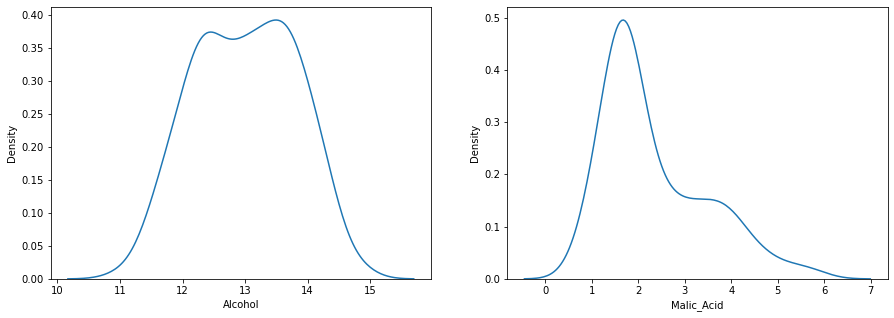

In [28]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

sns.kdeplot(df['Alcohol'], ax=ax1)
sns.kdeplot(df['Malic_Acid'],ax=ax2)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic_Acid'>

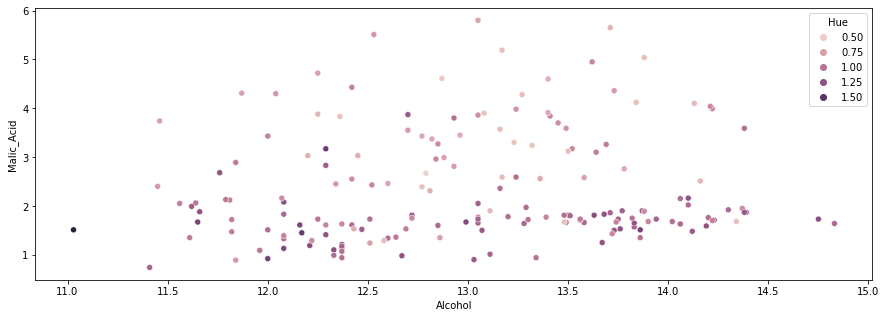

In [47]:
plt.figure(figsize=(15,5))


sns.scatterplot(df['Alcohol'],df['Malic_Acid'],hue=df['Hue'])

# Traing and Testing

In [59]:
from sklearn.model_selection import train_test_split

x = df.drop('Hue',axis=1)
y = df['Hue']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=1)

x_train.shape,x_test.shape

((142, 2), (36, 2))

# Scalling Min-Max

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)


#Transforming x_train and x_test
x_train_scalled = scaler.transform(x_train)
x_test_scalled = scaler.transform(x_test)

In [61]:
x_train.describe()

,Alcohol,Malic_Acid
count,142.000000,142.000000
mean,12.992465,2.403662
std,0.803806,1.169124
min,11.030000,0.900000
25%,12.347500,1.592500
50%,13.050000,1.875000
75%,13.660000,3.222500
max,14.830000,5.800000


In [64]:
x_train_scalled = pd.DataFrame(x_train_scalled,columns=x_train.columns)
x_test_scalled = pd.DataFrame(x_test_scalled,columns=x_test.columns)

In [67]:
x_train_scalled

,Alcohol,Malic_Acid
0,0.255263,0.124490
1,0.444737,0.185714
2,0.276316,0.100000
3,0.807895,0.228571
4,0.713158,0.157143
...,...,...
137,0.439474,0.540816
138,0.394737,0.940816
139,0.647368,0.155102
140,0.500000,0.389796


In [66]:
np.round(x_train_scalled.describe())

,Alcohol,Malic_Acid
count,142.0,142.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


Text(0.5, 1.0, 'After Scalled')

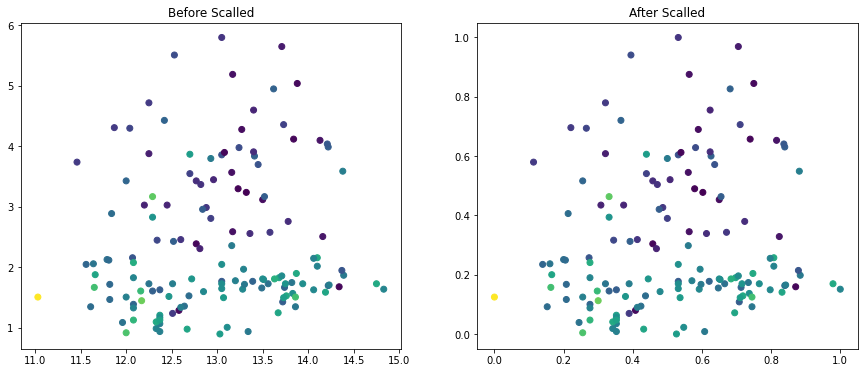

In [73]:
fig,(ax_1,ax_2) = plt.subplots(ncols=2,figsize=(15,6))

ax_1.scatter(x_train['Alcohol'],x_train['Malic_Acid'],c=y_train)
ax_1.set_title('Before Scalled')

ax_2.scatter(x_train_scalled['Alcohol'],x_train_scalled['Malic_Acid'],c=y_train)
ax_2.set_title('After Scalled')

<AxesSubplot:title={'center':'After Scalled'}, xlabel='Alcohol', ylabel='Density'>

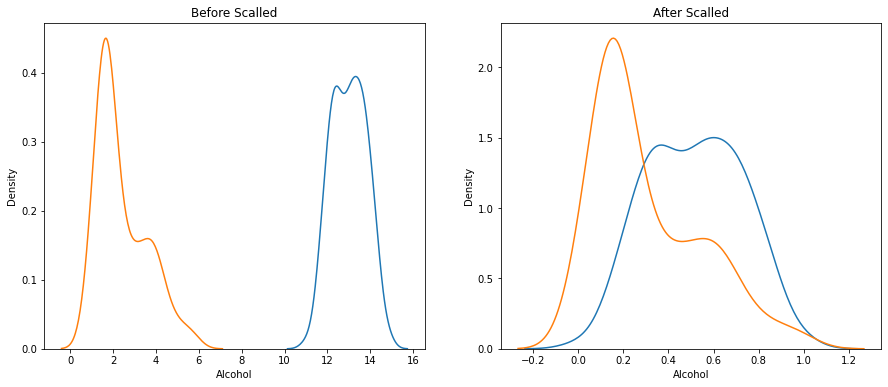

In [88]:
fig,(ax_1,ax_2) = plt.subplots(ncols=2,figsize=(15,6))

ax_1.set_title('Before Scalled')
sns.kdeplot(x_train['Alcohol'] ,ax=ax_1)
sns.kdeplot(x_train['Malic_Acid'],ax=ax_1)


ax_2.set_title('After Scalled')
sns.kdeplot(x_train_scalled['Alcohol'],ax=ax_2)
sns.kdeplot(x_train_scalled['Malic_Acid'],ax=ax_2)

## Mean normalization
 <img src="image/mean.png">

## Max absolute scalling

<img src="image/max.png">

## Robust scalling
<img src="image/robust.png">